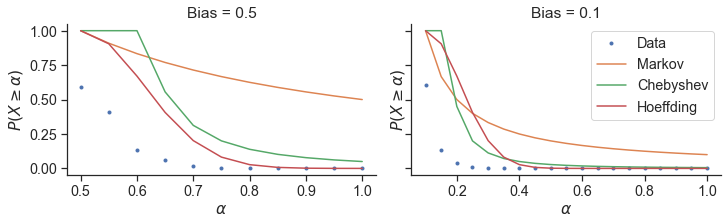

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Dont go above 1
def max1(l):
    return np.minimum(np.ones(len(l)),l)

# Find and draw the inequalities on a matplotlib axis
def find_ineqs(rand,freqs,Var,ax):
    bias = np.mean(np.mean(rand,axis = 1))
    
    
    # Markov
    ps = []
    for f in freqs:
        ps.append(np.sum(np.mean(rand,axis = 1) >= f)/len(rand))

    ax.plot(freqs,ps,'.',label = 'Data')
    
    E = bias
    ax.plot(freqs,max1(E/freqs),label = 'Markov')

    
    # Chebychev
    Cheb = Var/(rand.shape[1]*(-freqs + bias + 1e-11)**2)

    ax.plot(freqs,max1(Cheb),label = 'Chebyshev')

    
    # Hoeffding
    def hoeffding(freqs):
        return np.exp(-2*rand.shape[1]*freqs**2)

    Hoeff = hoeffding(-freqs + bias)
    ax.plot(freqs,max1(Hoeff),label = 'Hoeffding')

    # Make the plot pretty
    ax.set_xlabel("$\\alpha$")
    ax.set_ylabel("$P(X\geq\\alpha)$")
    
    sns.despine()
  
# Make pretty
sns.set(font_scale=1.3,style = "ticks")
fig,axs = plt.subplots(1,2,figsize=(10,3),sharey=True,constrained_layout=True)

# Bias 0.5
axs[0].set_title("Bias = 0.5")
rand = np.random.choice([0,1],(int(1e6),20),p=(0.5,0.5))
alpha = np.arange(0.5,1.05,0.05)
find_ineqs(rand,alpha,0.5-0.25,axs[0])

# Bias 0.1
plt.title("Bias = 0.1")
rand = np.random.choice([0,1],(int(1e6),20),p=(0.9,0.1))
alpha = np.arange(0.1,1.05,0.05)
find_ineqs(rand,alpha,0.1-0.01,axs[1])
axs[1].legend()

# Done!
plt.show()

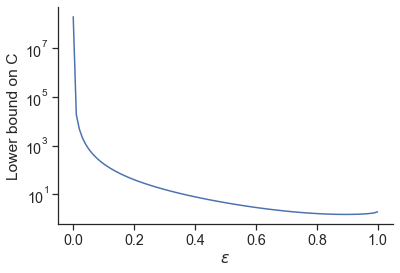

In [154]:
# A quick script for the last question

xx = np.linspace(0,0.999,100)+0.0001
fnc = lambda x: 2/x**2-2*np.sqrt(1-x**2)/x
plt.plot(xx,fnc(xx))
plt.yscale("log")
sns.despine()
plt.xlabel("$\\varepsilon$")
plt.ylabel("Lower bound on C")

plt.show()